In [3]:
import pathlib

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [5]:
TEX_RC_PARAMS = {
    'backend': 'ps',
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'font.family': 'serif',
    'mathtext.fontset' : 'cm'
}

In [6]:
NOTEBOOK_DIR = pathlib.Path.cwd()

DATA_FOLDER = NOTEBOOK_DIR / "data"
if not DATA_FOLDER.exists():
    raise ValueError("Data folder with results not found.")

IMG_FOLDER = NOTEBOOK_DIR / "img"
IMG_FOLDER.mkdir(parents=True, exist_ok=True)

In [7]:
AMP_LABEL = "mid"
AMP_VAL = 0.3

MIN_RES_VAR = 0.001
MAX_RES_VAR = 0.1
NUM_SEEDS = 6000
DISTANCE = 3

arr_name = f"mixed_device_yield_d_{DISTANCE}_resist_{MIN_RES_VAR}_{MAX_RES_VAR}_seeds_{NUM_SEEDS}_num_collisions_{AMP_LABEL}_drive.nc"
num_collisions = xr.load_dataarray(DATA_FOLDER / arr_name)

NUM_COLLISION_TPYES = num_collisions.collision_ind.size
NUM_RES_VARS = num_collisions.resist_var.size

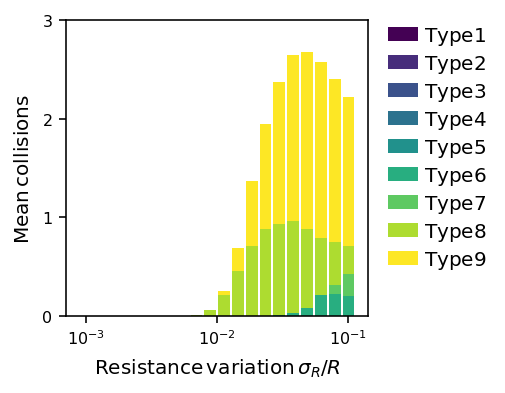

In [8]:
SAVE_IMAGE = False

bar_bottom = np.zeros(NUM_RES_VARS, dtype=float)
BAR_WIDTH = 0.09

cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, 9))

with plt.rc_context(TEX_RC_PARAMS):
    fig, ax = plt.subplots(
        figsize=(3.39, 2.6189190273276797), 
        constrained_layout=True
    )
    
    avg_cols = num_collisions.mean(dim="seed")
    
    for ind in range(NUM_COLLISION_TPYES):
        type_cols = avg_cols.isel(collision_ind = ind)
        color = colors[ind]
        
        label = r"$\mathrm{Type} %d$" % (ind + 1)
        
        ax.bar(
            np.log10(type_cols.resist_var), 
            type_cols,  
            width=BAR_WIDTH, 
            bottom=bar_bottom, 
            label=label,
            color=color,
            align="center",
        )
        bar_bottom = type_cols

    ytick_vals = list(range(4))
    ax.set_yticks(ytick_vals)
    ax.set_yticklabels(["$%d$" % val for val in ytick_vals])
    ax.set_ylim(0, 3)
    ax.set_ylabel("$\mathrm{Mean} \, \mathrm{collisions}$")

    xtick_vals = [-3, -2, -1]
    ax.set_xticks(xtick_vals)
    ax.set_xticklabels(["$10^{%d}$" % val for val in xtick_vals])
    ax.set_xlabel("$\mathrm{Resistance} \, \mathrm{variation} \, \sigma_{R}/R$")
    
    ax.legend(
        frameon=False, 
        ncol=1,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        handletextpad=0.3,
        labelspacing=0.3,
        borderpad=0.2,
        markerscale=1.0,
        handlelength=1.5,
        borderaxespad=0.05,
        columnspacing=0.4
    )    
    
    image_name = f"avg_num_col_vs_resist_var_d_{DISTANCE}_drive_amp_{AMP_VAL}"
    if SAVE_IMAGE:
        for file_format in ('pdf', 'png'):
            full_name = f"{image_name}.{file_format}"
            fig.savefig(
                IMG_FOLDER / full_name,  
                dpi=300,  
                bbox_inches='tight', 
                transparent=True, 
                format=file_format,
                pad_inches=0
            )
plt.show()